In [148]:
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]

# Figuring out how to calculate simpson

In [149]:
df = pd.io.parsers.read_csv('data/yob2016.txt', header=None)

In [150]:
df.head()

,0,1,2
0,Emma,F,19414
1,Olivia,F,19246
2,Ava,F,16237
3,Sophia,F,16070
4,Isabella,F,14722


In [151]:
df_m = df[df[1].str.match('M')]

In [152]:
df_m.head()

,0,1,2
18757,Noah,M,19015
18758,Liam,M,18138
18759,William,M,15668
18760,Mason,M,15192
18761,James,M,14776


In [153]:
total_m = df_m[2].values.sum()

In [154]:
# Simpson
sum([x * (x - 1) for x in df_m[2].values]) / (total_m * (total_m - 1))

0.0025445123750695922

# Now trying it for all years

In [155]:
def get_simpson(year):
    df = pd.io.parsers.read_csv('data/yob{}.txt'.format(year), header=None)
    df_m = df[df[1].str.match('M')]
    total_m = df_m[2].values.sum()
    return sum([x * (x - 1) for x in df_m[2].values]) / (total_m * (total_m - 1))

In [156]:
years = range(1930, 2017)
diversities = [get_simpson(year) for year in years]

In [157]:
s = pd.Series(diversities, years)

In [158]:
s.head()

1930    0.015854
1931    0.015886
1932    0.015705
1933    0.015625
1934    0.015564
dtype: float64

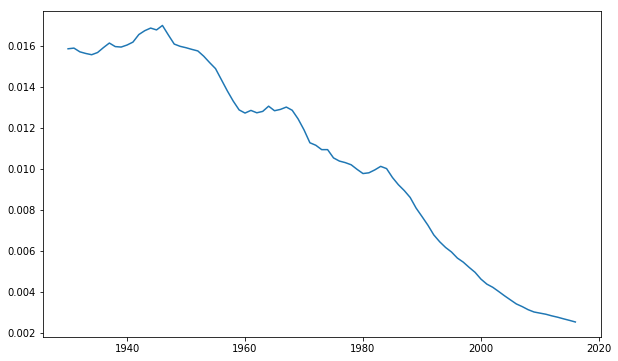

In [159]:
s.plot()

# Figuring it out on reduced names

In [160]:
df_m['reduced_name'] = df_m[0].str.replace('[aeiouy]', '')

/Users/dmitry/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
df_m.head()

,0,1,2,reduced_name
18757,Noah,M,19015,Nh
18758,Liam,M,18138,Lm
18759,William,M,15668,Wllm
18760,Mason,M,15192,Msn
18761,James,M,14776,Jms


In [162]:
df_m_reduced = df_m.groupby('reduced_name')[2].sum()

In [163]:
df_m_reduced.head()

reduced_name
A         17
Ab       239
Abb        5
Abbcr     17
Abbkr     86
Name: 2, dtype: int64

In [164]:
print(df_m.shape)
print(df_m_reduced.shape)

(14111, 4)
(5940,)


In [165]:
total_m_reduced = df_m_reduced.values.sum()
# Simpson
print(sum([x * (x - 1) for x in df_m_reduced.values]) / (total_m * (total_m - 1)))

0.0031123038944


# Reduced names for all years

In [166]:
def get_simpson_reduced(year):
    df = pd.io.parsers.read_csv('data/yob{}.txt'.format(year), header=None)
    df_m = df[df[1].str.match('M')]
    df_m['reduced_name'] = df_m[0].str.replace('[aeiouy]', '')
    df_m_reduced = df_m.groupby('reduced_name')[2].sum()
    total_m_reduced = df_m_reduced.values.sum()
    return sum([x * (x - 1) for x in df_m_reduced.values]) / (total_m * (total_m - 1))

In [167]:
years = range(1930, 2017)
diversities_reduced = [get_simpson_reduced(year) for year in years]

/Users/dmitry/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [168]:
s_reduced = pd.Series(diversities_reduced, years)

In [169]:
s_reduced.head()

1930    0.005556
1931    0.004997
1932    0.004987
1933    0.004472
1934    0.004839
dtype: float64

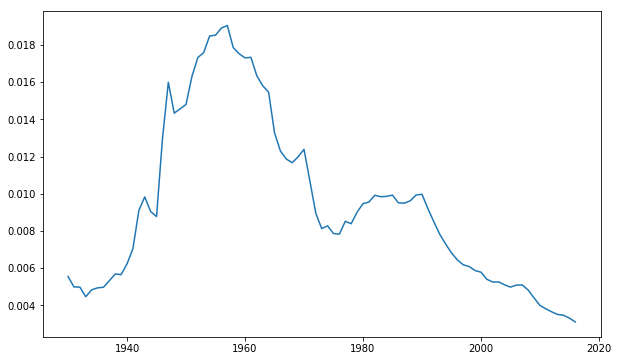

In [170]:
s_reduced.plot()

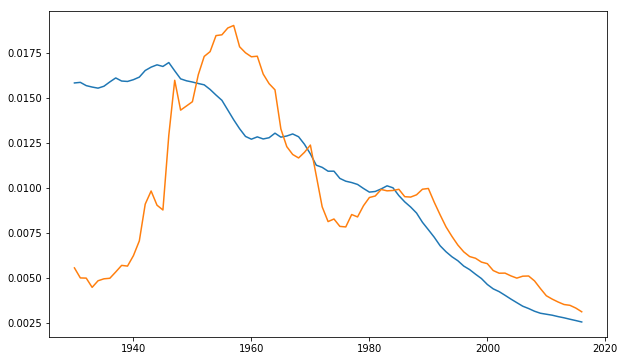

In [171]:
s.plot()
s_reduced.plot()